<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最適化アルゴリズム

+ #### 最適化アルゴリズム

    - #### 勾配降下法

    - #### 確率的勾配降下法(SGD)

    - #### Adagrad

    - #### RMSprop

    - #### NAG

    - #### AdaDelta

    - #### Adam



In [ ]:
import matplotlib as plt
import numpy as np
import pandas as pd

最適化アルゴリズムの目的とは、**損失関数を0に近づけること**です。

そして、活性化関数をシグモイドとすれば、損失は$$L=(t-y)^2=(t-\frac{1}{1+e^{-w_1x}})^2$$

となります。ここで入力データ$x=2$、正解値$y=1$であったとすれば
$$L(w_1)=(1-\frac{1}{1+e^{-2w_1}})^2$$

つまり、この損失を0に近づける**重み$w_1$**を見つけることが目的です。

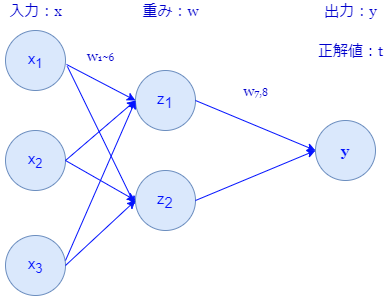

In [ ]:
#@title 重みwを変えてみましょう。
w = -14 #@param {type:"slider", min:-100, max:100, step:1}

import numpy as np
L = (1-(1/(1+np.exp(-2*w))))**2
L

0.9999999999986171

#今回使用するモデル

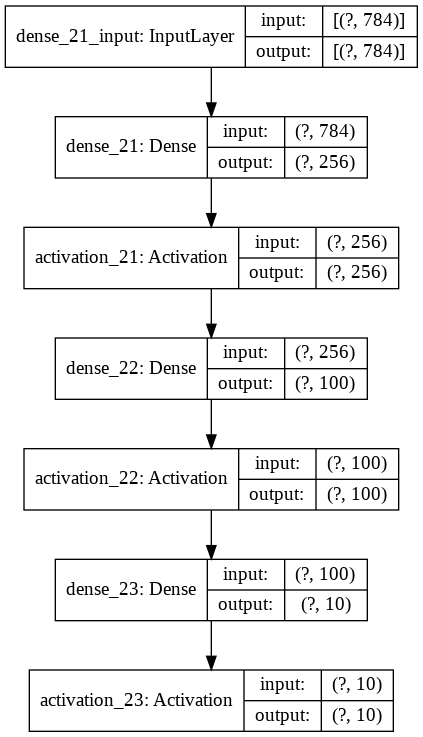

In [ ]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Fashion MNISTのデータをロードする。
from tensorflow.keras.datasets import fashion_mnist
#xが入力、yが出力、trainが訓練用、testがテスト用
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255

# 出力結果をone-hot表現に変換します。
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#モデルの構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

def get_model():
  #Sequential():層を直列につなぐシンプルなモデル
  model = Sequential()

  #np.shapeはtapple型で表記され、tppleでは、要素が一つの時、(x,)と書かなくてはいけない
  model.add(Dense(units=256, input_shape=(784,))) # 次元の変化: 784 -> 256
  model.add(Activation('relu'))
  model.add(Dense(units=100)) # 次元の変化: 256 -> 100
  model.add(Activation('relu'))
  model.add(Dense(units=10)) # 次元の変化: 100 -> 10
  model.add(Activation('softmax'))
  return model


# モデル構造の可視化
from keras.utils import plot_model
m = get_model()
plot_model(m, show_shapes=True,)

# 最適化アルゴリズム

詳細はこちら

(https://qiita.com/omiita/items/1735c1d048fe5f611f80)

(https://qiita.com/ZoneTsuyoshi/items/8ef6fa1e154d176e25b8)

## 最急降下法

いわゆる基本中の基本
$$
\boldsymbol{w}_{t+1}\leftarrow\boldsymbol{w}_t-\eta\frac{\partial L}{\partial\boldsymbol{w}_t}
$$
 $\boldsymbol{w}$:パラメータ , $\eta$:学習率(通常0.01)

この場合、$\eta$が大きいと最適値を通り越し、小さいとなかなか収束しないという事態に陥ります。

学習の手順としては、
1. 全入力データ$x_{0～N}$を入れて、予測値$y$を求める

2. 正解値$t$との二乗誤差$L$を求める

3. 損失関数を各パラメタで微分。

4. 上記の式で各パラメタを更新

つまり更新回数＝エポック数

しかし、この場合計算量が大きい、かつ**局所的極小値**に陥る場合があります。

イメージとしては、ひたすらゴルフでドライバーを使い続ける感じ？

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
%%time
model_GD = get_model()
#epochsは1, batch_size=60000とすると
model_GD.compile(optimizer="sgd",loss="categorical_crossentropy", metrics=["acc"])
history_GD=model_GD.fit(x_train,y_train,verbose=0,batch_size=60000, epochs=10,validation_data=(x_test,y_test))

Test loss 2.133481502532959
Test accuracy 22.850%


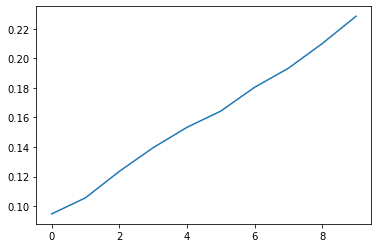

In [ ]:
#性能評価
score_GD = model_GD.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_GD[0])
print("Test accuracy {:.3f}%".format(score_GD[1]*100))

# 結果の可視化
result_GD = pd.DataFrame(history_GD.history)

# 目的関数の可視化
result_GD['val_acc'].plot();

## **確率的勾配降下法SGD**

GDの場合は全データを使っていましたが、SGDの場合は更新ことにランダムに**ミニバッチ（訓練データの部分集合）**を構成して、そのミニバッチごとに勾配を計算し、その平均でパラメタを更新します。

メリット
- **学習率が一定**
- **収束結果が安定している**

デメリット
- **学習に時間がかかる**
- **振動や鞍点に陥りやすい**

更新回数＝ミニバッチ数xエポック数

イメージとしては、アイアンでいい感じに接近する感じ？やっぱりホール近くになると効率が悪い

ミニバッチ：イメージ図
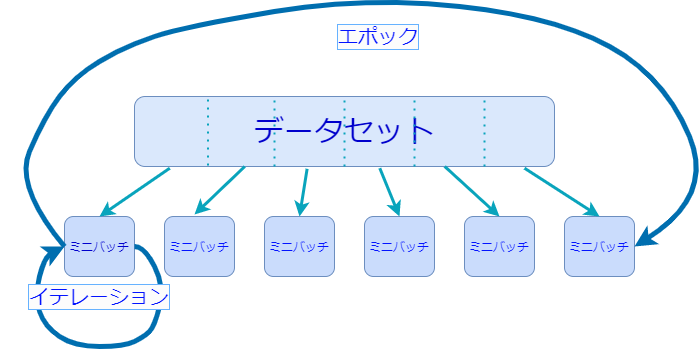

In [ ]:
%%time
model_SGD = get_model()
model_SGD.compile(optimizer="sgd",loss="categorical_crossentropy", metrics=["acc"])
history_SGD = model_SGD.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

Test loss 0.3691462576389313
Test accuracy 86.780%


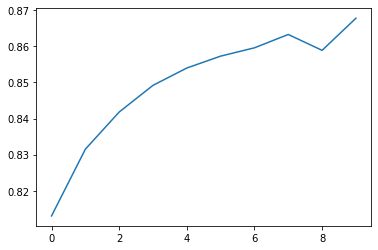

In [ ]:
score_SGD = model_SGD.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_SGD[0])
print("Test accuracy {:.3f}%".format(score_SGD[1]*100))

# 結果の可視化
result_SGD = pd.DataFrame(history_SGD.history)

# 目的関数の可視化
result_SGD['val_acc'].plot();

しかし、平均的に更新することで局所的解に陥ることはなくなりましたが、一方で最適な更新ではなく、1度の更新が大きすぎてしまう**オーバーシュート**が発生してしまいます。

つまり、効率的に更新できているわけではないので学習に時間がかかってしまいます。

##さてこれ以降は、このSGDをどのように改良していくかです。

ポイントは
1. **勾配を学習の進捗に合わせて変更**
2. **学習率を学習の進捗に合わせて変更**

## モーメンタム

パラメタを更新する際に前回の更新量を踏まえて更新します。これにより、より滑らかに勾配を更新することができます。

$$
\boldsymbol{v}_t\leftarrow\alpha\boldsymbol{v}_{t-1}-\eta\frac{\partial L}{\partial\boldsymbol{w}_t}
$$
$$
\boldsymbol{w}_{t+1}\leftarrow\boldsymbol{w}_t+\boldsymbol{v}_t
$$
$\boldsymbol{v}$:前回の更新量, $\alpha$:モーメンタム

メリット
- **SGDと同様に安定している**
- **鞍点に陥りにくい**

慣性項$\alpha\boldsymbol{v}$を加えることで、前回の更新が大きければさらにより大きく更新するようになる。

これによって、もし急激に$\eta\frac{\partial L}{\partial\boldsymbol{w}_t}$の項が小さくなっても、前回の更新が大きければ大きく更新できるようになる。これが、鞍点に陥りにくくなりさらに学習のスピードが上がる理由です。

```py
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
```

引数は、

* lr: 学習率、0以上の実数
* momentum: モーメンタム、0以上の実数（前回のパラメータ更新量を反映させる比率）
* decay: 更新毎の学習率の減衰率、0以上の実数
* nesterov: Nesterov momentumを適用するかどうか（Trueならモーメンタム項の計算を1ステップ先読みして評価します）


前ステップの更新を加味することで、 勾配の変化を滑らかにします。

これによって、「通り過ぎる」ことによる行ったり来たりの振動を抑制することができます。




また、勾配変化の少ない（パラメータ空間内の）通常の斜面においては、

他の勾配変化の大きい斜面と比較して学習率が上昇し、加速的に学習が進むという効果を持っています。

通常は`momentum=0.9`程度に設定します。

メリットは
- **学習の時間が早い**
- **広範囲を探索できるために局所的な解に陥りにくい**

ということで画像分類の問題では2020年4月現在でもよくつかわれています



In [ ]:
from keras import optimizers
m = optimizers.SGD(lr=0.01, momentum=0.9)

In [ ]:
%%time
model_Momentum = get_model()
model_Momentum.compile(optimizer=m, loss="categorical_crossentropy", metrics=["acc"])
histroty_Momentum = model_Momentum.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

Test loss 0.3420892059803009
Test accuracy 88.090%
CPU times: user 613 ms, sys: 41 ms, total: 654 ms
Wall time: 503 ms


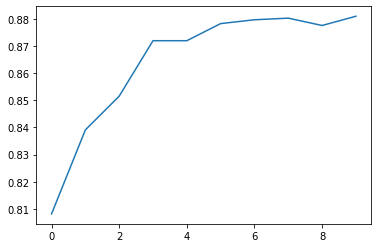

In [ ]:
score_Momentum = model_Momentum.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_Momentum[0])
print("Test accuracy {:.3f}%".format(score_Momentum[1]*100))

# 結果の可視化
result_Momentum = pd.DataFrame(histroty_Momentum.history)

# 目的関数の可視化
result_Momentum['val_acc'].plot();

## NAG

MomentumSGDのさらに改良型。

現在のパラメータよりも一歩先のパラメータを仮定することでパラメータの変化量をより適切な方向に整えます。


$$
\boldsymbol{v}_t\leftarrow\beta_1\boldsymbol{v}_{t-1}+\eta\Delta(\boldsymbol{w}_t+\beta_1\boldsymbol{v}_{t-1})
$$

$$
\boldsymbol{w}_{t+1}\leftarrow\boldsymbol{w}_t-\boldsymbol{m}_t
$$


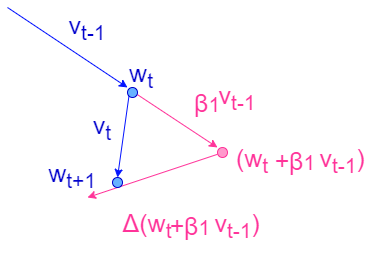

$v_{t-1}$: 前回の更新量,　 $w_t$: 現在のパラメタ量,　 $\beta_1 v_{t-1}$: 現在の慣性

$(w_t+\beta_1 v_{t-1})$: 予想される次のパラメタ量, 　$\Delta(w_t+\beta_1 v_{t-1})$：予想される次の更新量,

 $v_t$: 今回の更新量, 　$w_{t+1}$: 次回のパラメタ量


In [ ]:
from keras import optimizers
#nesterov=Trueとする
NAG = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)

In [ ]:
%%time
model_NAG = get_model()
model_NAG.compile(optimizer=NAG, loss="categorical_crossentropy", metrics=["acc"])
histroty_NAG = model_NAG.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

CPU times: user 1min 20s, sys: 4.64 s, total: 1min 24s
Wall time: 56 s


Test loss 0.3249816596508026
Test accuracy 88.420%


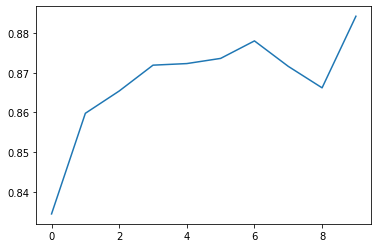

In [ ]:
score_NAG = model_NAG.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_NAG[0])
print("Test accuracy {:.3f}%".format(score_NAG[1]*100))

# 結果の可視化
result_NAG = pd.DataFrame(histroty_NAG.history)

# 目的関数の可視化
result_NAG['val_acc'].plot();

## Adagrad

**学習率を次第に減衰**させていき、SGDで起こってしまう学習の後半のオーバーシュートを防ぐ役割があります。



しかし、学習が一気に進むとその分学習率が0に近づいてしまうため学習が進みにくくなるという欠点もあります。そのため学習率の選択、また重みの初期値の選択は慎重に行う必要があります。

通常`lr=0.01`
```py
from keras.optimizers import Adagrad
model.compile(loss='categorical_crossentropy', optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0))
```

$h$はこれまで計算してきた勾配の二乗和を記憶する役割を持ちます。
そして学習が進むにつれ$h$が大きくなり更新量は次第に小さくなります。

勾配の情報が出にくいパラメタは$h$が小さくなるため、更新の際に大きく更新されやすく、逆に勾配の情報が出やすいものは$h$の値が大きくなるので、更新の際に細かく少しずつ更新されます。

例えば、自然言語ではめったに出現しない単語に関しては、一気に更新したほうが正確な値まで一気に更新できます。


$$
h_{t+1}\leftarrow h_{t}+(\frac{\partial L}{\partial\boldsymbol{w}_{t}})^2
$$

$$
\boldsymbol{w}_{t+1}\leftarrow\boldsymbol{w}_t-\eta\frac{1}{\sqrt{h_t}+\epsilon}\frac{\partial L}{\partial\boldsymbol{w}_t}
$$
なお、$\varepsilon$は計算機上での0割りを回避するためのもので、ごく小さい値（`epsilon=10^-8`）を指定します。


In [ ]:
%%time
from keras.optimizers import Adagrad
model_Adagrad = get_model()
model_Adagrad.compile(optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0), loss="categorical_crossentropy", metrics=["acc"])
histroty_Adagrad = model_Adagrad.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

CPU times: user 1min 14s, sys: 5.33 s, total: 1min 20s
Wall time: 52.3 s


Test loss 0.3463616669178009
Test accuracy 87.620%


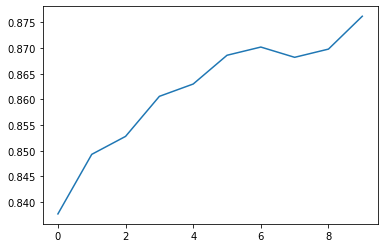

In [ ]:
score_Adagrad = model_Adagrad.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_Adagrad[0])
print("Test accuracy {:.3f}%".format(score_Adagrad[1]*100))

# 結果の可視化
result_Adagrad = pd.DataFrame(histroty_Adagrad.history)

# 目的関数の可視化
result_Adagrad['val_acc'].plot();

## RMSprop

Adagradでは、学習率は常に減衰していくため、途中で0になれば学習は進まなくなります。そこで、**学習の進捗に合わせて随時更新**していくようにしたのがRMSpropです。

基本的にはRNNで利用されます。

ふつうは`rho=0.9`  $\rho$はどれだけ過去の勾配を重視するかを表します。そして、$(1-\rho)$の部分で適度にこれまでの情報を**忘却**しています。
```py
# RMSPropの実装例
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0))
```

$$
h_{t+1}\leftarrow \rho h_t+(1-\rho)(\frac{\partial L}{\partial\boldsymbol{w_t}})^2
$$

$$
\boldsymbol{w}_{t+1}\leftarrow\boldsymbol{w}_t-\eta\frac{1}{\sqrt{h_t}+\epsilon}\frac{\partial L}{\partial\boldsymbol{w}_t}
$$


In [ ]:
%%time
from keras.optimizers import RMSprop
model_RMSprop = get_model()
#RESpropはデフォルトパラメータのまま利用することを推奨されています
model_RMSprop.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), loss="categorical_crossentropy", metrics=["acc"])
histroty_RMSprop = model_RMSprop.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

CPU times: user 1min 52s, sys: 9.15 s, total: 2min 1s
Wall time: 1min 14s


Test loss 0.5537796020507812
Test accuracy 85.550%


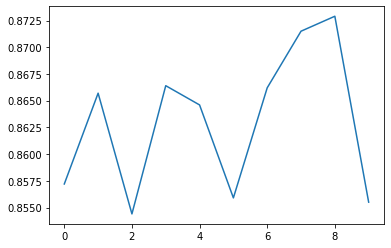

In [ ]:
score_RMSprop = model_RMSprop.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_RMSprop[0])
print("Test accuracy {:.3f}%".format(score_RMSprop[1]*100))

# 結果の可視化
result_RMSprop = pd.DataFrame(histroty_RMSprop.history)

# 目的関数の可視化
result_RMSprop['val_acc'].plot();

## AdaDelta

RMSpropによって学習率が不可逆的に悪化することを防ぐことができましたが、AdaGradの全体の学習率に鋭敏であるという性質はそのままです。

この全体の学習率への鋭敏性、つまり問題設定毎に適切な学習率が変化してしまうという問題は、

実は更新量と勾配の次元の不一致を学習率で調整していることによるものです。（ここでの次元は物理的な次元のことで、いわゆる単位に相当するものです）

そこで、AdaDeltaではそうした次元の不一致を加味して自動的に適切な学習率が設定されるようにしています。

具体的には、勾配の2乗の指数移動平均に加えて、更新量の2乗の指数移動平均をもちい、両者の比を学習率として設定しています。

（なぜこれで次元の不一致に対処可能かは詳しく扱いませんが、Newton法が次元に対してロバストである＋Hessian逆行列の近似を利用して導出されます）

Kerasでは、`keras.optimizers.Adadelta`クラスを用います。RMSpropと同様に、更新量と勾配の指数移動平均を制御するパラメータ`rho`を設定できます。

通常`rho=0.95`とすることが推奨されています。

なお、Kerasの実装では一応学習率`lr`を設定できるようになっていますが、AdaDeltaの提案論文では学習率は自動的に決定されるものとしている上、

Kerasの公式HPでも`lr`はデフォルトのままとすることを推奨しているため、学習率の設定は基本的に不要です。

```py
# Adadeltaの実装例
from keras.optimizers import Adadelta
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0))
```

<small>
<参考>

更新式は次の通りです。（$\Delta\boldsymbol{w}^{(t)}_i$、$\nabla\mathrm{E}(\boldsymbol{w}^{(t)})_i$：AdaGradと同じ、$\rho$：勾配・更新量情報の減衰率（引数rho））

$$
    u_i^{(t)} = \rho u_i^{(t-1)} + (1-\rho)(\Delta\boldsymbol{w}^{(t)}_i)^2 \quad (u_i^{(0)}=0)\\
    v_i^{(t)} = \rho v_i^{(t-1)} + (1-\rho)(\nabla\mathrm{E}(\boldsymbol{w}^{(t)})_i)^2 \quad (v_i^{(0)}=0)\\
    \Delta\boldsymbol{w}^{(t)}_i=-\frac{\sqrt{u_i^{(t)}+\varepsilon}}{\sqrt{v_i^{(t)}+\varepsilon}}\nabla\mathrm{E}(\boldsymbol{w}^{(t)})_i
$$
</small>

In [ ]:
%%time
from keras.optimizers import Adadelta
model_Adadelta = get_model()
model_Adadelta.compile(optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0), loss="categorical_crossentropy", metrics=["acc"])
histroty_Adadelta = model_Adadelta.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

CPU times: user 1min 26s, sys: 6.35 s, total: 1min 32s
Wall time: 59.9 s


Test loss 0.3443198800086975
Test accuracy 87.750%


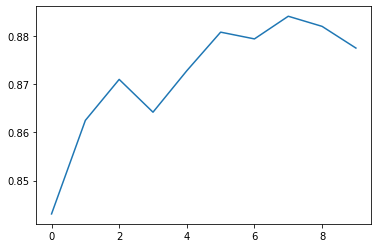

In [ ]:
score_Adadelta = model_Adadelta.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_Adadelta[0])
print("Test accuracy {:.3f}%".format(score_Adadelta[1]*100))

# 結果の可視化
result_Adadelta = pd.DataFrame(histroty_Adadelta.history)

# 目的関数の可視化
result_Adadelta['val_acc'].plot();

## Adam

Adamは現在、主流の最適化アルゴリズムとなりつつあり、NAGとRMSpropのいいとこどりになっています。

Adamでは、各方向への勾配の2乗に加えて勾配自身も、指数移動平均による推定値に置き換えています。



Kerasでは、`keras.optimizers.Adam`クラスを使用します。

パラメータとしては、勾配、勾配の2乗それぞれの指数移動平均を制御するパラメータとして`beta_1,beta_2`が新たに指定可能です。

ほとんどの場合はデフォルトのパラメータが推奨されています。

```py
# Adamの実装例
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
)
```

<small>
<参考>

更新式は次の通りです。（$\Delta\boldsymbol{w}^{(t)}_i$、$\nabla\mathrm{E}(\boldsymbol{w}^{(t)})_i$、$\eta$：RMSpropと同じ、$\beta_1,\beta_2$：勾配情報の減衰率（引数beta_1,beta_2））

$$
\boldsymbol{v}_t\leftarrow\beta_1\boldsymbol{v}_{t-1}-\eta\frac{\partial L}{\partial\boldsymbol{w}_{t-1}}
$$
$$
  h_t\leftarrow \beta_2 h_{t-1}+(1-\beta_2)(\frac{\partial L}{\partial\boldsymbol{w_{t-1}}})^2
$$
$$
    \hat{v}_t = \frac{v_t}{1-\beta_{1,t}}\\
    \hat{h}_t = \frac{h_t}{1-\beta_{2,t}}\\
$$
$$
    \boldsymbol{w}_{t+1}\leftarrow \boldsymbol{w}_t -\eta\frac{\hat{v}_t}{\sqrt{\hat{h}_t+\varepsilon}}
$$

なお、$v_t,h_t$を$\hat{v}_t,\hat{h}_t$に変換しているのは、

各々勾配の1次モーメントと2次モーメントの推定量としてみた時、バイアスを持ってしまうため、その分を補正する役割です。
</small>

In [ ]:
%%time
from keras.optimizers import Adam
model_Adam = get_model()
model_Adam.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), loss="categorical_crossentropy", metrics=["acc"])
histroty_Adam = model_Adam.fit(x_train,y_train,verbose=0,batch_size=32, epochs=10, validation_data=(x_test,y_test))

CPU times: user 1min 19s, sys: 4.85 s, total: 1min 24s
Wall time: 53.1 s


Test loss 0.3246273398399353
Test accuracy 88.690%


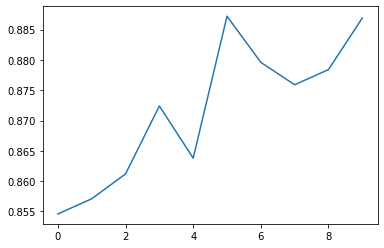

In [ ]:
score_Adam = model_Adam.evaluate(x_test, y_test, verbose=0)
print("Test loss", score_Adam[0])
print("Test accuracy {:.3f}%".format(score_Adam[1]*100))

# 結果の可視化
result_Adam = pd.DataFrame(histroty_Adam.history)

# 目的関数の可視化
result_Adam['val_acc'].plot();

https://github.com/matsuolab-edu/dl4us/blob/master/lesson1/figures/optimizer.gif